## 합성곱 신경망을 사용한 이미지 분류

In [64]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [65]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [66]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [67]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [68]:
train_scaled.shape

(48000, 28, 28, 1)

In [69]:
# 합성곱 신경망
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [70]:
model.add(keras.layers.MaxPooling2D(2))

In [71]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))

In [72]:
model.add(keras.layers.MaxPooling2D(2))

In [73]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [74]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape        ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)         │ (None, 28, 28, 32)  │        320 │
├───────────────────────────┼─────────────────────┼────────────┤
│ max_pooling2d_6           │ (None, 14, 14, 32)  │          0 │
│ (MaxPooling2D)            │                     │            │
├───────────────────────────┼─────────────────────┼────────────┤
│ conv2d_8 (Conv2D)         │ (None, 14, 14, 64)  │     18,496 │
├───────────────────────────┼─────────────────────┼────────────┤
│ max_pooling2d_7           │ (None, 7, 7, 64)    │          0 │
│ (MaxPooling2D)            │                     │            │
├───────────────────────────┼─────────────────────┼────────────┤
│ flatten_3 (Flatten)       │ (None, 3136)        │          0 │
├───────────────────────────┼─────────────────────┼────────────┤
│ dense_6 (Dense)           │ (None, 100)         │    313,700 │
├───────────────────────────┼─────────────────────┼────────────┤
│ dropout_3 (Dropout)       │ (None, 100)         │          0 │
├───────────────────────────┼─────────────────────┼────────────┤
│ dense_7 (Dense)           │ (None, 10)          │      1,010 │
└───────────────────────────┴─────────────────────┴────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
# keras.utils.plot_model(model)

In [76]:
print(
    train_scaled.shape,
    train_target.shape,
    val_scaled.shape,
    val_target.shape
)

(48000, 28, 28, 1) (48000,) (12000, 28, 28, 1) (12000,)


In [77]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cp_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
es_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[cp_cb, es_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7547 - loss: 0.6808 - val_accuracy: 0.8762 - val_loss: 0.3387
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8740 - loss: 0.3502 - val_accuracy: 0.9015 - val_loss: 0.2768
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.8947 - loss: 0.2894 - val_accuracy: 0.9032 - val_loss: 0.2611
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9048 - loss: 0.2624 - val_accuracy: 0.9122 - val_loss: 0.2380
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9139 - loss: 0.2336 - val_accuracy: 0.9147 - val_loss: 0.2389
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9226 - loss: 0.2088 - val_accuracy: 0.9017 - val_loss: 0.2729


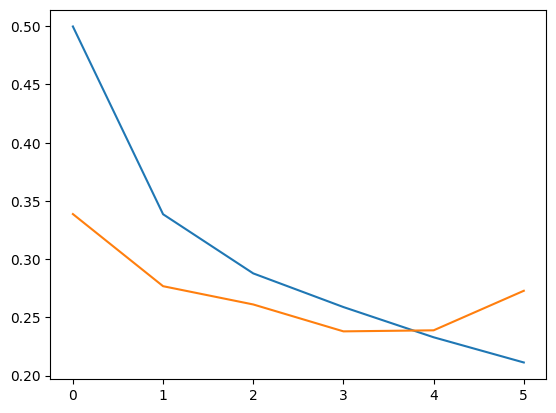

In [79]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [19]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1091 - loss: 2.3022


[2.301683187484741, 0.11341666430234909]

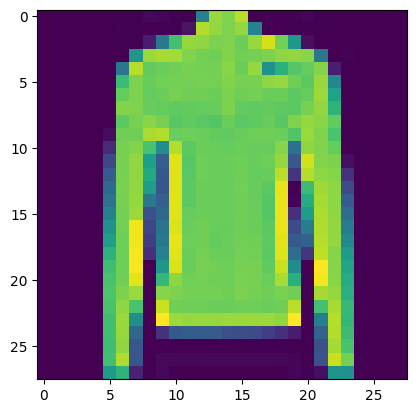

In [80]:
plt.imshow(val_scaled[0].reshape(28, 28))
plt.show()

In [81]:
import numpy as np
np.round(model.predict(val_scaled[:5]), decimals=2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.  , 0.  , 0.96, 0.  , 0.03, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.54, 0.  , 0.01, 0.01, 0.01, 0.  , 0.42, 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [82]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [83]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9091 - loss: 0.2627


[0.2543940544128418, 0.9075000286102295]